# EDA

In [1]:
# !pip3 install --upgrade git+https://github.com/vfdev-5/ImageDatasetViz
# !pip3 install iterative-stratification

In [1]:
from pathlib import Path

import sys
sys.path.insert(0, (Path(".").resolve().parent / "common").as_posix())

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

In [3]:
INPUT_PATH = Path(".").resolve().parent / "input"

In [7]:
train_df = pd.read_csv(INPUT_PATH / "train.csv")
test_df = pd.read_csv(INPUT_PATH / "sample_submission.csv")

In [8]:
len(train_df), len(test_df)

(31072, 11702)

In [6]:
train_df.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [7]:
test_df.head()

,Id,Predicted
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,0
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,0
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,0
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,0
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,0


Split tags

In [8]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}


reverse_train_labels = dict((v,k) for k,v in label_names.items())


def fill_targets(row):
    target = np.array(row['Target'].split(" ")).astype(np.int)
    for num in target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

tags = sorted(list(label_names.values()))
tags

['Actin filaments',
 'Aggresome',
 'Cell junctions',
 'Centrosome',
 'Cytokinetic bridge',
 'Cytoplasmic bodies',
 'Cytosol',
 'Endoplasmic reticulum',
 'Endosomes',
 'Focal adhesion sites',
 'Golgi apparatus',
 'Intermediate filaments',
 'Lipid droplets',
 'Lysosomes',
 'Microtubule ends',
 'Microtubule organizing center',
 'Microtubules',
 'Mitochondria',
 'Mitotic spindle',
 'Nuclear bodies',
 'Nuclear membrane',
 'Nuclear speckles',
 'Nucleoli',
 'Nucleoli fibrillar center',
 'Nucleoplasm',
 'Peroxisomes',
 'Plasma membrane',
 'Rods & rings']

In [9]:
for key in label_names.keys():
    train_df[label_names[key]] = 0

train_df = train_df.apply(fill_targets, axis=1)

In [10]:
train_df["number_of_tags"] = train_df.drop(["Id", "Target"],axis=1).sum(axis=1)

In [11]:
train_df.head(10)

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings,number_of_tags
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,25 2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
7,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,2 0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9,002daad6-bbc9-11e8-b2bc-ac1f6b6435d0,7,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Unique targets

In [12]:
value_counts = train_df['Target'].value_counts()

In [13]:
value_counts.head()

0       2414
25 0    1998
23      1653
25      1470
7       1163
Name: Target, dtype: int64

In [14]:
len(value_counts), value_counts.index[:20]

(582,
 Index(['0', '25 0', '23', '25', '7', '4', '21', '2 0', '5', '2', '0 21', '7 0',
        '3', '6', '11', '23 0', '19', '14', '5 0', '25 21'],
       dtype='object'))

In [15]:
value_counts.tail()

2 0 27      1
22 16 17    1
25 11 5     1
22 7 2 0    1
12 16 0     1
Name: Target, dtype: int64

Targets containing a single tag

In [16]:
m = train_df["number_of_tags"] < 2
train_df[m].shape

(15126, 31)

In [17]:
train_df.loc[m, label_names.values()].sum(axis=0)

Nucleoplasm                      2414
Nuclear membrane                  271
Nucleoli                          808
Nucleoli fibrillar center         654
Nuclear speckles                 1077
Nuclear bodies                    983
Endoplasmic reticulum             622
Golgi apparatus                  1163
Peroxisomes                        31
Endosomes                          17
Lysosomes                           0
Intermediate filaments            601
Actin filaments                   232
Focal adhesion sites              157
Microtubules                      484
Microtubule ends                    0
Cytokinetic bridge                 27
Mitotic spindle                     0
Microtubule organizing center     314
Centrosome                        522
Lipid droplets                     98
Plasma membrane                  1058
Cell junctions                    213
Mitochondria                     1653
Aggresome                         122
Cytosol                          1470
Cytoplasmic 

In [18]:
train_df[train_df['Rods & rings'] > 0].shape

(11, 31)

In [19]:
train_df.loc[m, 'Target'].unique()

array(['5', '1', '18', '0', '7', '23', '21', '25', '11', '13', '12', '2',
       '20', '3', '14', '19', '6', '4', '26', '22', '8', '24', '16', '9',
       '27'], dtype=object)

Trainval/Test stats

In [37]:
path = INPUT_PATH / "train"

from PIL import Image


def get_four_images(image_id, path):
    r_img_path = Path(path) / "{}_red.png".format(image_id)
    b_img_path = Path(path) / "{}_blue.png".format(image_id)
    y_img_path = Path(path) / "{}_yellow.png".format(image_id)
    g_img_path = Path(path) / "{}_green.png".format(image_id)

    r_img = Image.open(r_img_path)
    b_img = Image.open(b_img_path)
    y_img = Image.open(y_img_path)
    g_img = Image.open(g_img_path)
    return r_img, b_img, y_img, g_img


import cv2


def get_png_image_stats(image_id, band_name, path):
    img_path = Path(path) / "{}_{}.png".format(image_id, band_name)
    img = cv2.imread(img_path.as_posix())
    assert img is not None, "Failed to read file {}".format(img_path)
    assert img.ndim == 3, "Wrong shape, expected (H, W, 3) but given {}".format(img.shape)
    data = img[:, :, 0]
    data = data.reshape(-1)
    stats_per_band = [
        np.min(data, axis=0), 
        np.percentile(data, q=2.5, axis=0), 
        np.percentile(data, q=97.5, axis=0), 
        np.max(data, axis=0),
        np.mean(data, axis=0), 
        np.std(data, axis=0)
    ]    
    return stats_per_band


In [21]:
img_stats = get_png_image_stats("00070df0-bbc3-11e8-b2bc-ac1f6b6435d0", "yellow", INPUT_PATH / "train")
img_stats

[0, 0.0, 29.0, 162, 5.9388275146484375, 8.305648168347359]

In [22]:
stat_cols = ['min', 'p2.5', 'p97.5', 'max', 'mean', 'std']
color_cols = ['red', 'blue', 'green', 'yellow']
for c in color_cols:
    for s in stat_cols:
        train_df.loc[:, "{}_{}".format(c, s)] = 0


from joblib import Parallel, delayed
import tqdm

parallel = Parallel(n_jobs=8)

image_ids = train_df['Id'].values
path = INPUT_PATH / "train"

for c in color_cols:
    data = parallel(delayed(get_png_image_stats)(image_id, c, path) for image_id in tqdm.tqdm(image_ids))
    data = np.array(data)
    for i, s in enumerate(stat_cols):
        train_df.loc[:, "{}_{}".format(c, s)] = data[:, i]    

100%|██████████| 31072/31072 [00:27<00:00, 1141.53it/s]


In [23]:
train_df.head()

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,green_p97.5,green_max,green_mean,green_std,yellow_min,yellow_p2.5,yellow_p97.5,yellow_max,yellow_mean,yellow_std
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,1,0,0,0,0,0,0,0,...,39.0,255.0,7.881340,12.118499,0.0,0.0,29.0,162.0,5.938828,8.305648
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,1,1,1,0,0,0,0,1,...,72.0,255.0,8.969318,20.736550,0.0,0.0,83.0,255.0,13.581589,23.558461
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,0,0,0,0,0,1,0,0,...,18.0,245.0,1.486912,5.674990,0.0,0.0,145.0,255.0,19.732368,39.629747
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,0,1,0,0,0,0,0,0,...,68.0,255.0,15.172382,20.499230,0.0,0.0,46.0,193.0,8.243237,13.313905
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,0,0,0,0,0,0,0,0,...,17.0,255.0,2.681259,8.348541,0.0,0.0,196.0,255.0,67.706821,52.833453


In [24]:
r_img, b_img, y_img, g_img = get_four_images("00070df0-bbc3-11e8-b2bc-ac1f6b6435d0", INPUT_PATH / "train")

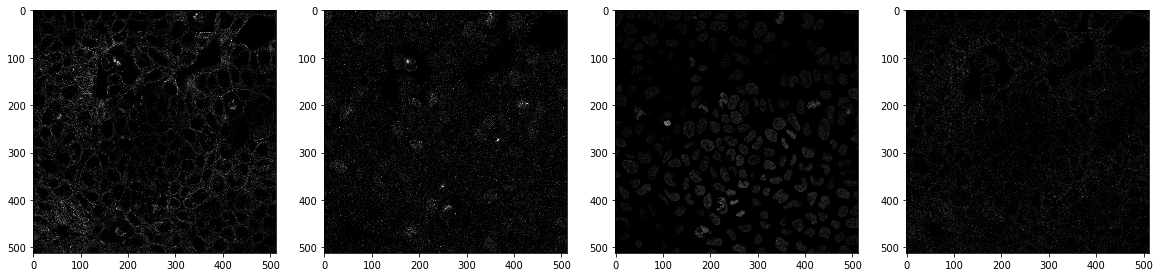

In [25]:
plt.figure(figsize=(20, 10))
plt.subplot(141)
plt.imshow(r_img)
plt.subplot(142)
plt.imshow(g_img)
plt.subplot(143)
plt.imshow(b_img)
plt.subplot(144)
plt.imshow(y_img)

In [26]:
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

In [27]:
stat_cols = ['min', 'p2.5', 'p97.5', 'max', 'mean', 'std']
color_cols = ['red', 'blue', 'green', 'yellow']
for c in color_cols:
    for s in stat_cols:
        test_df.loc[:, "{}_{}".format(c, s)] = 0


from joblib import Parallel, delayed
import tqdm

parallel = Parallel(n_jobs=8)

image_ids = test_df['Id'].values
path = INPUT_PATH / "test"

for c in color_cols:
    data = parallel(delayed(get_png_image_stats)(image_id, c, path) for image_id in tqdm.tqdm(image_ids))
    data = np.array(data)
    for i, s in enumerate(stat_cols):
        test_df.loc[:, "{}_{}".format(c, s)] = data[:, i]    

100%|██████████| 11702/11702 [00:09<00:00, 1258.59it/s]


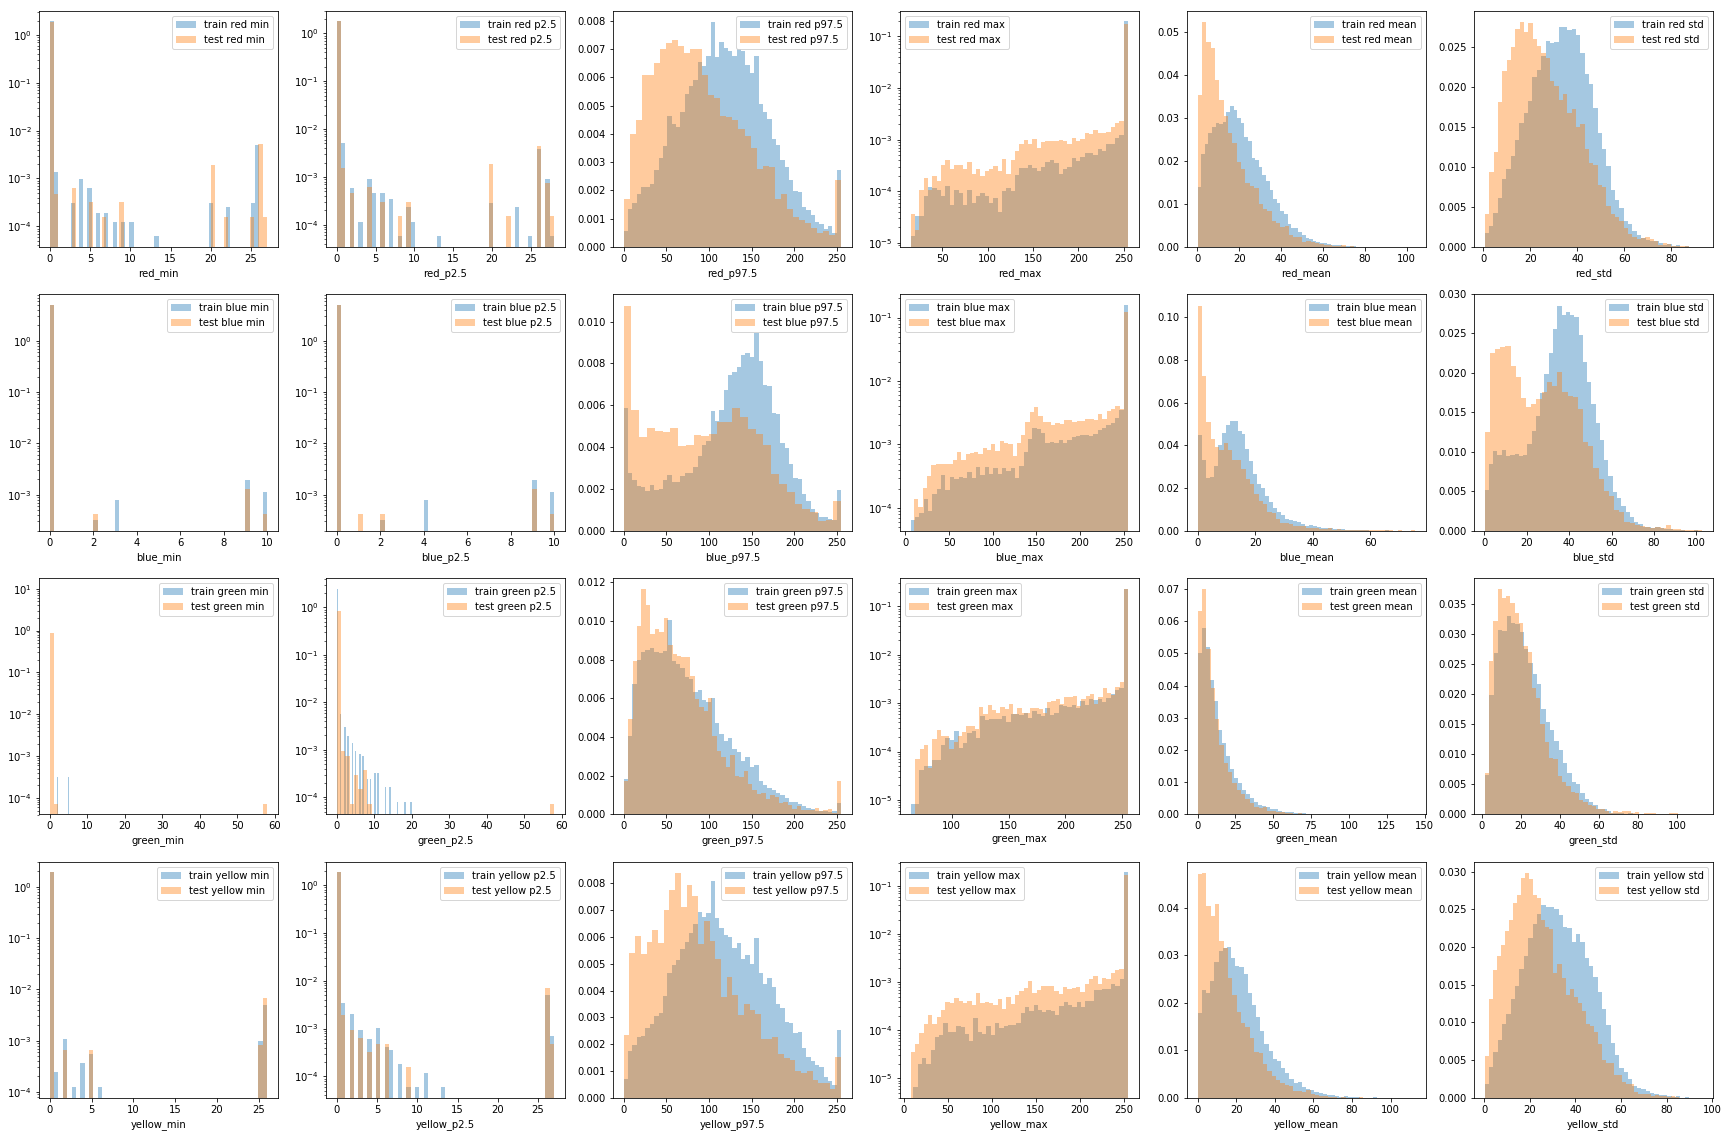

In [31]:
stat_cols = ['min', 'p2.5', 'p97.5', 'max', 'mean', 'std']
color_cols = ['red', 'blue', 'green', 'yellow']

plt.figure(figsize=(30, 20))
counter = 0
for c in color_cols:
    for s in stat_cols:
        ax = plt.subplot(len(color_cols), len(stat_cols), counter + 1)
        data = train_df["{}_{}".format(c, s)]
        g = sns.distplot(data, kde=False, norm_hist=True, ax=ax, label="train {} {}".format(c, s))
        if s in ['min', 'p2.5', 'max']:
            g.set_yscale('log')

        data = test_df["{}_{}".format(c, s)]
        g = sns.distplot(data, kde=False, norm_hist=True, ax=ax, label="test {} {}".format(c, s))
        if s in ['min', 'p2.5', 'max']:
            g.set_yscale('log')      
        
        plt.legend()
        counter += 1

Color stats by tags

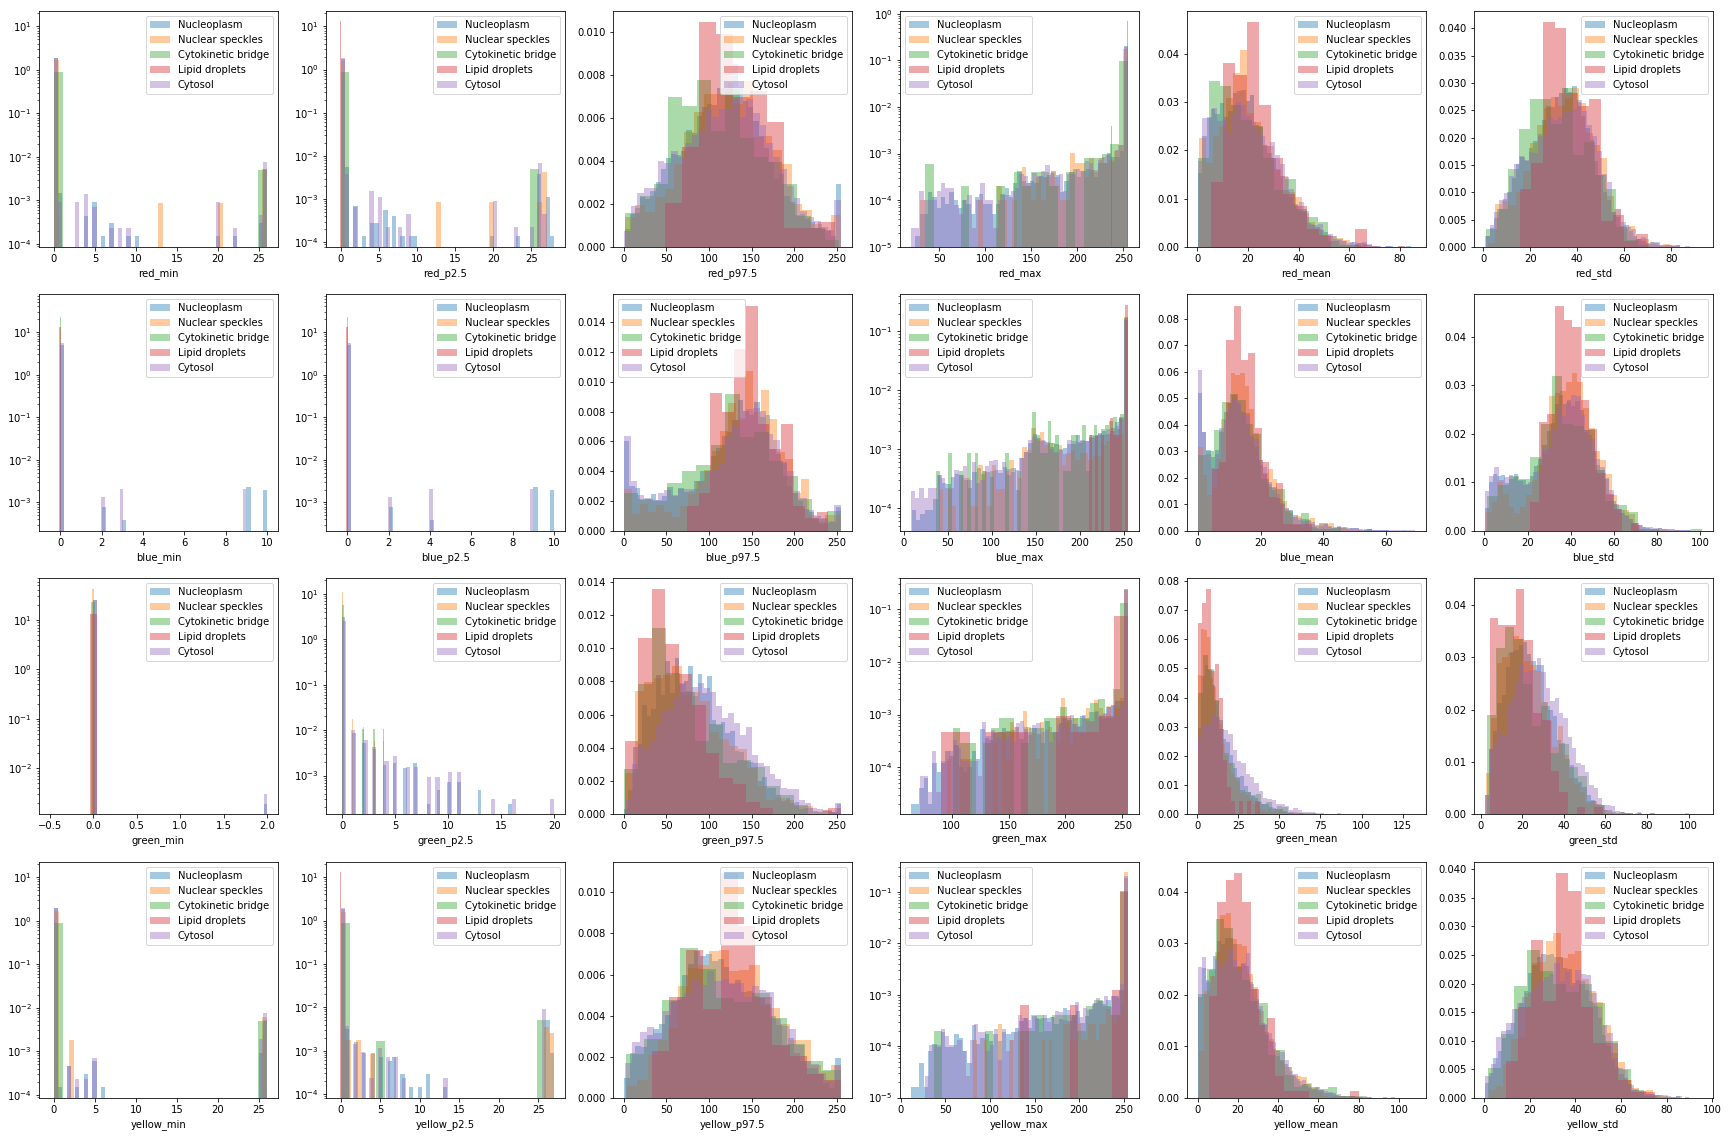

In [38]:
stat_cols = ['min', 'p2.5', 'p97.5', 'max', 'mean', 'std']
color_cols = ['red', 'blue', 'green', 'yellow']

tags = list(label_names.values())
selected_tags = [tags[0], tags[4], tags[16], tags[20], tags[25]]

plt.figure(figsize=(30, 20))
counter = 0
for c in color_cols:
    for s in stat_cols:
        ax = plt.subplot(len(color_cols), len(stat_cols), counter + 1)
        
        for tag in selected_tags:
            m = train_df[tag] > 0
            data = train_df.loc[m, "{}_{}".format(c, s)]
            g = sns.distplot(data, kde=False, norm_hist=True, ax=ax, label="{}".format(tag))
            if s in ['min', 'p2.5', 'max']:
                g.set_yscale('log')

        plt.legend()
        counter += 1

Export images

In [29]:
from image_dataset_viz import DatasetExporter, render_datapoint

In [ ]:
train_gb = train_df.copy()
train_gb.index = train_gb['Id']

In [165]:
from PIL import Image
from PIL.ImageOps import autocontrast
from PIL.ImageChops import add_modulo, add



def get_image(image_id, path, s=256):
    r_img_path = Path(path) / "{}_red.png".format(image_id)
    b_img_path = Path(path) / "{}_blue.png".format(image_id)
    y_img_path = Path(path) / "{}_yellow.png".format(image_id)
    g_img_path = Path(path) / "{}_green.png".format(image_id)

    r_img = Image.open(r_img_path)
    b_img = Image.open(b_img_path)
    y_img = Image.open(y_img_path)
    g_img = Image.open(g_img_path)
    
    rr_img = r_img.resize((s, s), resample=Image.BICUBIC)
    rr_img = autocontrast(rr_img, cutoff=2.5)

    bb_img = b_img.resize((s, s), resample=Image.BICUBIC)
    bb_img = autocontrast(bb_img, cutoff=2.5)

    yy_img = y_img.resize((s, s), resample=Image.BICUBIC)
    yy_img = autocontrast(yy_img, cutoff=2.5)

    gg_img = g_img.resize((s, s), resample=Image.BICUBIC)
    gg_img = autocontrast(gg_img, cutoff=2.5)
    
    img = Image.new("L", size=(2 * s, 2 * s))
    img.paste(rr_img, box=(0, 0))
    img.paste(gg_img, box=(s, 0))
    img.paste(bb_img, box=(0, s))
    img.paste(yy_img, box=(s, s))
    return img.convert("RGB")


def get_color_image(image_id, path, s=320):
    r_img_path = Path(path) / "{}_red.png".format(image_id)
    b_img_path = Path(path) / "{}_blue.png".format(image_id)
    y_img_path = Path(path) / "{}_yellow.png".format(image_id)
    g_img_path = Path(path) / "{}_green.png".format(image_id)

    r_img = Image.open(r_img_path)
    b_img = Image.open(b_img_path)
    y_img = Image.open(y_img_path)
    g_img = Image.open(g_img_path)
    
    rr_img = r_img.resize((s, s), resample=Image.BICUBIC)
    rr_img = autocontrast(rr_img, cutoff=1.0)
    gg_img = g_img.resize((s, s), resample=Image.BICUBIC)
    gg_img = autocontrast(gg_img, cutoff=1.0)    
    bb_img = b_img.resize((s, s), resample=Image.BICUBIC)
    bb_img = autocontrast(bb_img, cutoff=1.0)    
    yy_img = y_img.resize((s, s), resample=Image.BICUBIC)
    yy_img = autocontrast(yy_img, cutoff=1.0)    

    rgb_img = Image.merge(mode='RGB', bands=[rr_img, gg_img, bb_img])
    wh_img = Image.merge(mode='RGB', bands=[yy_img, yy_img, yy_img])
    return add(rgb_img, wh_img)


def get_tags(image_id, _train_gb, _tags):
    res = _train_gb.loc[image_id, _tags]
    res = list(res[res > 0].index)
    return "\n".join(res)


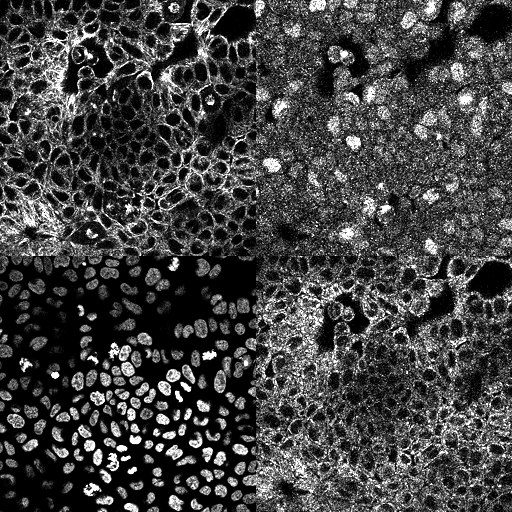

In [120]:
get_image("00070df0-bbc3-11e8-b2bc-ac1f6b6435d0", INPUT_PATH / "train")

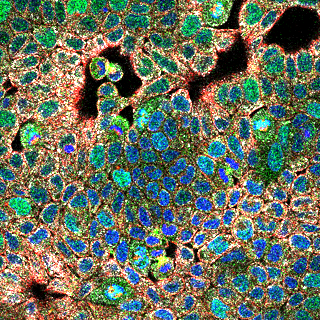

In [166]:
get_color_image("00070df0-bbc3-11e8-b2bc-ac1f6b6435d0", INPUT_PATH / "train")

In [121]:
get_tags("00070df0-bbc3-11e8-b2bc-ac1f6b6435d0", train_gb, tags)

'Cytokinetic bridge\nNucleoplasm'

In [173]:
from functools import partial

get_train_image_by = partial(get_color_image, path=INPUT_PATH / "train", s=320)
get_train_targets_by = partial(get_tags, _train_gb=train_gb, _tags=tags)

get_test_image_by = partial(get_color_image, path=INPUT_PATH / "test", s=320)

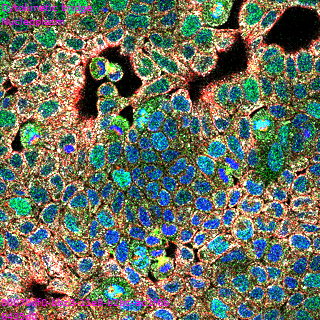

In [181]:
image_id = "00070df0-bbc3-11e8-b2bc-ac1f6b6435d0"

img = get_train_image_by("00070df0-bbc3-11e8-b2bc-ac1f6b6435d0")
targets = get_train_targets_by("00070df0-bbc3-11e8-b2bc-ac1f6b6435d0")

render_datapoint(img, targets, image_id=image_id, output_size=(320, 320), text_color=(255, 10, 255))

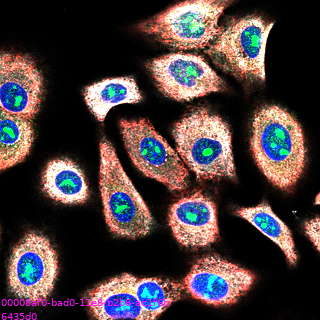

In [179]:
image_id = test_df.loc[0, "Id"]

img = get_test_image_by(image_id)
targets = None

render_datapoint(img, targets, image_id=image_id, output_size=(320, 320), text_color=(255, 10, 255))

export trainval

In [182]:
de = DatasetExporter(get_train_image_by, get_train_targets_by, max_output_img_size=(320, 320), 
                     n_cols=15, text_color=(255, 10, 255))

In [183]:
image_ids = list(train_df['Id'])

In [184]:
de.export_datapoint(image_ids[10], image_ids[10], output_filepath='test.png')

In [185]:
de.export(image_ids, image_ids, output_folder='HPA_rgb_trainval', filename_prefix='hpa_rgb_trainval')

100%|##########|31072/31072[21:03<00:00,24.59it/s]


export test

In [186]:
de = DatasetExporter(get_test_image_by, max_output_img_size=(320, 320), 
                     n_cols=15, text_color=(255, 10, 255))

In [187]:
image_ids = list(test_df['Id'])

In [188]:
de.export_datapoint(image_ids[10], target=None, output_filepath='test.png')

In [189]:
de.export(image_ids, None, output_folder='HPA_rgb_test', filename_prefix='hpa_rgb_test')

100%|##########|11702/11702[07:05<00:00,27.52it/s]


Tiffs

In [34]:
tiff_path = INPUT_PATH / "tiffs" / "train"

from PIL import Image


def get_four_images(image_id, path, mode='png'):
    assert mode in ['png', 'tif']
    r_img_path = Path(path) / "{}_red.{}".format(image_id, mode)
    b_img_path = Path(path) / "{}_blue.{}".format(image_id, mode)
    y_img_path = Path(path) / "{}_yellow.{}".format(image_id, mode)
    g_img_path = Path(path) / "{}_green.{}".format(image_id, mode)

    r_img = Image.open(r_img_path)
    b_img = Image.open(b_img_path)
    y_img = Image.open(y_img_path)
    g_img = Image.open(g_img_path)
    return r_img, b_img, y_img, g_img


import cv2


def get_tiff_image_stats(image_id, band_name, path):
    img_path = Path(path) / "{}_{}.tif".format(image_id, band_name)
    img = Image.open(img_path.as_posix())
    data = np.asarray(img)
    assert data.ndim == 2, "Wrong shape, expected (H, W) but given {}".format(data.shape)
    data = data.reshape(-1)
    stats_per_band = [
        np.min(data, axis=0), 
        np.percentile(data, q=2.5, axis=0), 
        np.percentile(data, q=97.5, axis=0), 
        np.max(data, axis=0),
        np.mean(data, axis=0), 
        np.std(data, axis=0),
        data.dtype,
    ]    
    return stats_per_band


In [38]:
img_stats = get_tiff_image_stats("000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0", "yellow", tiff_path)
img_stats

[0, 0.0, 83.0, 255, 13.562163829803467, 23.52607582915976, dtype('uint8')]

In [39]:
img_stats = get_png_image_stats("000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0", "yellow", path)
img_stats

[0, 0.0, 83.0, 255, 13.581588745117188, 23.558461213362683]

In [22]:
stat_cols = ['min', 'p2.5', 'p97.5', 'max', 'mean', 'std']
color_cols = ['red', 'blue', 'green', 'yellow']
for c in color_cols:
    for s in stat_cols:
        train_df.loc[:, "{}_{}".format(c, s)] = 0


from joblib import Parallel, delayed
import tqdm

parallel = Parallel(n_jobs=8)

image_ids = train_df['Id'].values
path = INPUT_PATH / "train"

for c in color_cols:
    data = parallel(delayed(get_png_image_stats)(image_id, c, path) for image_id in tqdm.tqdm(image_ids))
    data = np.array(data)
    for i, s in enumerate(stat_cols):
        train_df.loc[:, "{}_{}".format(c, s)] = data[:, i]    

100%|██████████| 31072/31072 [00:27<00:00, 1141.53it/s]


Train/Val split

In [49]:
tags = sorted(list(label_names.values()))

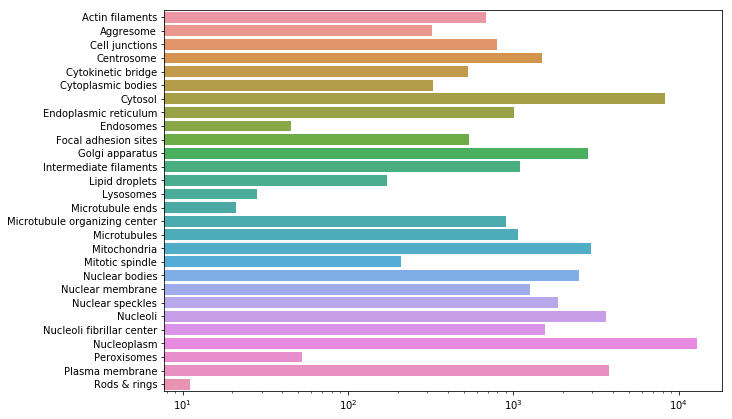

In [64]:
plt.figure(figsize=(10, 7))
g = sns.barplot(y=tags, x=train_df[tags].sum(axis=0))
g.set_xscale('log')
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

In [39]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [74]:
n_splits = 3
skf = MultilabelStratifiedKFold(n_splits=n_splits, random_state=12)

In [75]:
y = train_df[tags].values
x = y

In [76]:
train_fold_indices = []
val_fold_indices = []

for train_indices, val_indices in skf.split(x, y):
    train_fold_indices.append(train_indices)
    val_fold_indices.append(val_indices)    

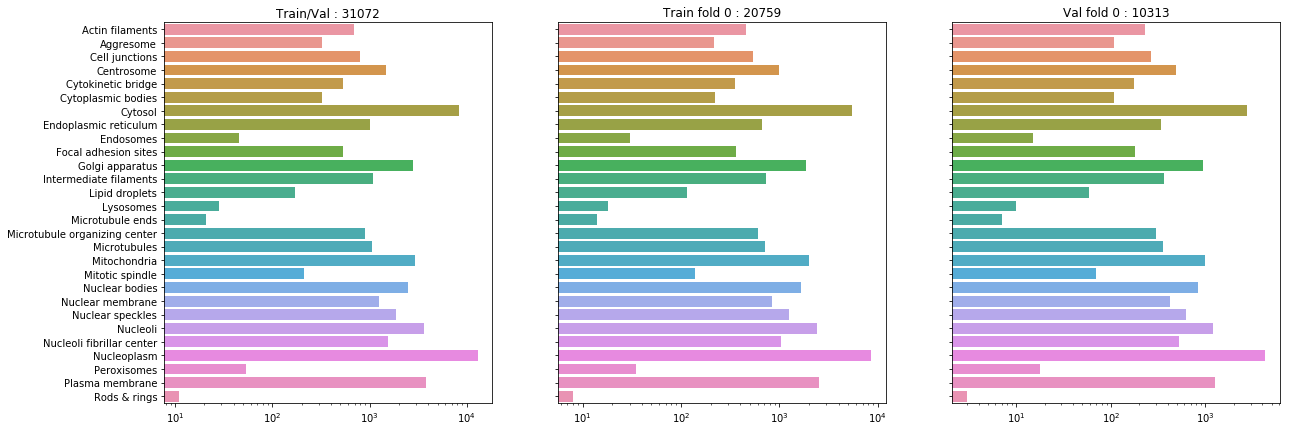

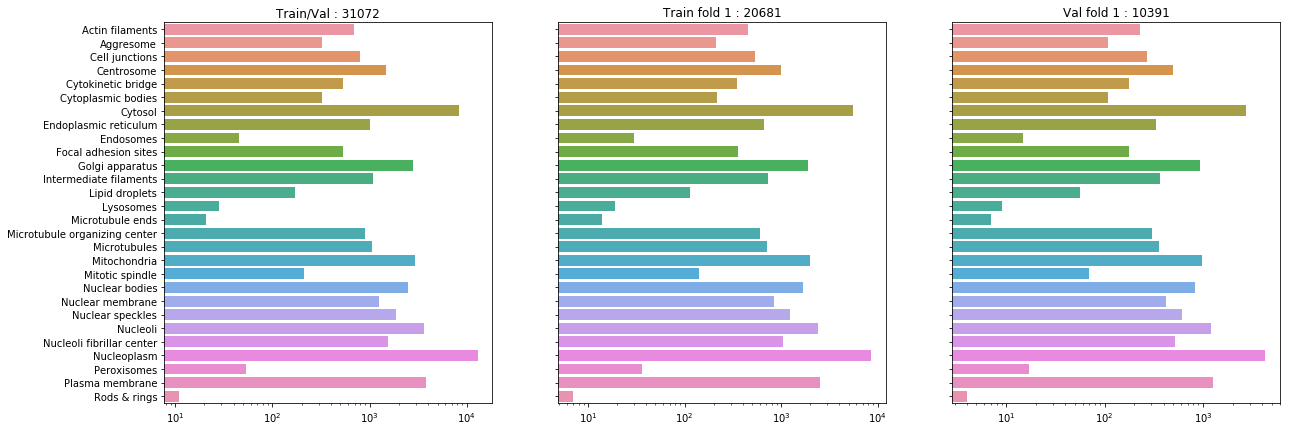

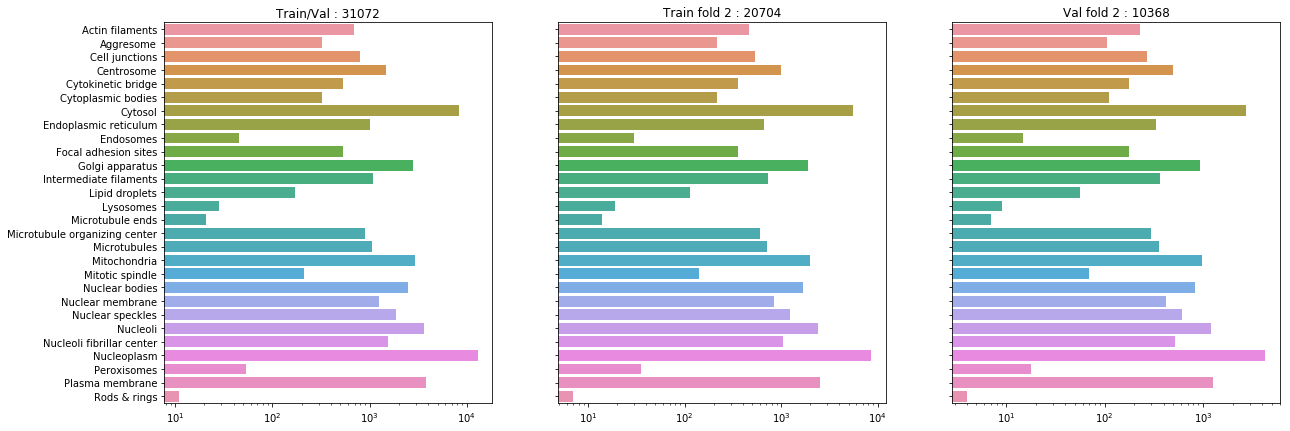

In [77]:
for fold_index in range(n_splits):

    train_df_indices = train_df.index[train_fold_indices[fold_index]]
    val_df_indices = train_df.index[val_fold_indices[fold_index]]
    
    plt.figure(figsize=(20, 7))
    plt.grid(which='both')
    plt.subplot(131)
    plt.title("Train/Val : {}".format(len(train_df)))
    g = sns.barplot(y=tags, x=train_df[tags].sum(axis=0))
    g.set_xscale('log')

    plt.subplot(132)
    x = train_df.loc[train_df_indices, tags]
    plt.title("Train fold {} : {}".format(fold_index, len(x)))
    g = sns.barplot(y=tags, x=x.sum(axis=0))
    g.set_xscale('log')
    g.set_yticklabels([]);    

    plt.subplot(133)
    x = train_df.loc[val_df_indices, tags]    
    plt.title("Val fold {} : {}".format(fold_index, len(x)))
    g = sns.barplot(y=tags, x=x.sum(axis=0))
    g.set_xscale('log')
    g.set_yticklabels([]);    
        

Dataflow

In [40]:
from pathlib import Path

import numpy as np
import pandas as pd

import cv2

from torch.utils.data import Dataset


def get_png_image(image_id, path):
    r_img_path = Path(path) / "{}_red.png".format(image_id)
    b_img_path = Path(path) / "{}_blue.png".format(image_id)
    y_img_path = Path(path) / "{}_yellow.png".format(image_id)
    g_img_path = Path(path) / "{}_green.png".format(image_id)
    
    r_img = cv2.imread(r_img_path.as_posix(), flags=cv2.IMREAD_GRAYSCALE)
    assert r_img is not None, "Failed to read image: {}".format(r_img_path)
    b_img = cv2.imread(b_img_path.as_posix(), flags=cv2.IMREAD_GRAYSCALE)
    assert b_img is not None, "Failed to read image: {}".format(b_img_path)    
    y_img = cv2.imread(y_img_path.as_posix(), flags=cv2.IMREAD_GRAYSCALE)
    assert y_img is not None, "Failed to read image: {}".format(y_img_path)    
    g_img = cv2.imread(g_img_path.as_posix(), flags=cv2.IMREAD_GRAYSCALE)
    assert g_img is not None, "Failed to read image: {}".format(g_img_path)    
    return np.concatenate([r_img[:, :, None], 
                           b_img[:, :, None], 
                           g_img[:, :, None], 
                           y_img[:, :, None]], axis=-1)


def get_tif_image(image_id, path):
    raise NotImplementedError()


class HPADataset(Dataset):

    tags = ['Actin filaments', 'Aggresome', 'Cell junctions', 'Centrosome', 
            'Cytokinetic bridge', 'Cytoplasmic bodies', 'Cytosol', 'Endoplasmic reticulum',
            'Endosomes', 'Focal adhesion sites', 'Golgi apparatus', 'Intermediate filaments',
            'Lipid droplets', 'Lysosomes', 'Microtubule ends', 'Microtubule organizing center',
            'Microtubules', 'Mitochondria', 'Mitotic spindle', 'Nuclear bodies', 'Nuclear membrane',
            'Nuclear speckles', 'Nucleoli', 'Nucleoli fibrillar center', 'Nucleoplasm',
            'Peroxisomes', 'Plasma membrane', 'Rods & rings']
    num_tags = len(tags)
    
    def __init__(self, dataframe, path, mode='png'):
        assert isinstance(dataframe, pd.DataFrame)
        path = Path(path)
        assert path.exists()
        assert mode in ('png', 'tif')
        self.path = path
        self.image_ids = list(dataframe['Id'])
        self.targets = None
        if "Target" in dataframe:
            self.targets = np.zeros((len(self.image_ids), self.num_tags), dtype=np.uint8)
            for i, tags in enumerate(dataframe['Target']):
                tags = tags.split(" ")
                for t in tags:
                    self.targets[i, int(t)] = 1
        else:
            self.targets = self.image_ids
        
        self.get_image_fn = get_png_image if mode == 'png' else get_tif_image
        self.mode = mode

    def __len__(self):
        return len(self.image_ids)
    
    def __getitem__(self, index):
        image_id = self.image_ids[index]
        img = self.get_image_fn(image_id, self.path)
        target = self.targets[index]
        return img, target

In [41]:
def visualize_datapoint(dp):    
    x, y = dp    
    img = x[:, :, 0:3] 
    img = np.clip(img + x[:, :, 3][:, :, None], 0, 255).astype(np.uint8)
    y = [str(v) for v in y]
    return render_datapoint(img, "".join(y))

In [42]:
ds = HPADataset(train_df, INPUT_PATH / "train")

In [43]:
len(ds)

31072

In [44]:
x, y = ds[0]
x.shape, x.dtype, y

((512, 512, 4),
 dtype('uint8'),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8))

In [45]:
x, y = ds[10]
x.shape, x.dtype, y

((512, 512, 4),
 dtype('uint8'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0], dtype=uint8))

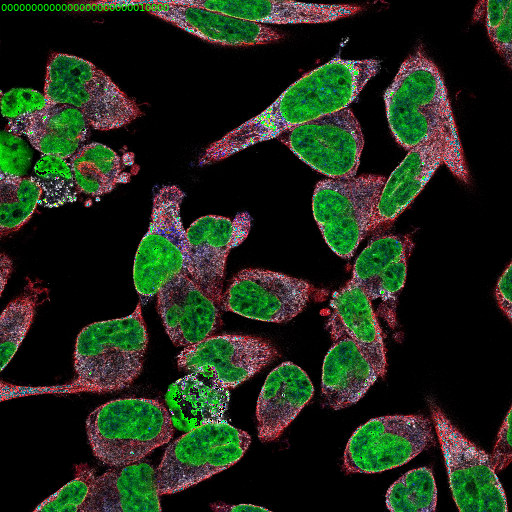

In [32]:
visualize_datapoint(ds[10])

In [46]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

In [47]:

class TransformedDataset(Dataset):
    
    def __init__(self, ds, transform_fn):
        assert isinstance(ds, Dataset)
        assert callable(transform_fn)
        self.ds = ds
        self.transform_fn = transform_fn
        
    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, index):
        dp = self.ds[index]
        return self.transform_fn(dp)


transformations 

In [48]:
# !pip3 install albumentations

In [49]:
from albumentations import Compose, RandomCrop, RandomCropNearBBox, ShiftScaleRotate, GaussNoise, ElasticTransform
from albumentations.pytorch import ToTensor

import cv2


transforms = Compose([
    ShiftScaleRotate(shift_limit=0.2, scale_limit=0.01, rotate_limit=15, interpolation=cv2.INTER_CUBIC, p=0.3),
    ElasticTransform(p=0.3),
    RandomCrop(224, 224),
    ToTensor()
])

In [50]:
transform_fn = lambda dp: transforms(**{"image": dp[0], "tags": dp[1]})

transformed_ds = TransformedDataset(ds, transform_fn=transform_fn)

In [51]:
x, y = ds[0]
res = transforms(**{"image": x, "tags": y})

In [52]:
res['image'].shape, res['image'].min(), res['image'].max()

(torch.Size([4, 224, 224]), tensor(0.), tensor(1.))

In [44]:
# visualize_datapoint((res['image'].transpose(0, 2).numpy(), res['tags']))

batching

In [53]:
train_loader = DataLoader(transformed_ds, batch_size=8, num_workers=4)

In [55]:
batch = next(iter(train_loader))

In [56]:
type(batch), batch.keys()

In [57]:
type(batch['image']), batch['image'].shape

In [58]:
type(batch['tags']), batch['tags'].shape

In [59]:
batch['tags']

Batch sampling

In [66]:
tags = sorted(list(label_names.values()))

In [67]:
y = train_df[tags].values

In [108]:
tag_weights = np.power(y.sum(axis=0), 0.77)
tag_weights = 20.0 / tag_weights
tag_weights

array([0.13064323, 0.23441261, 0.11609559, 0.07235639, 0.15971201,
       0.23110383, 0.01933096, 0.0973566 , 1.06673455, 0.15810653,
       0.04406574, 0.0914729 , 0.37990332, 1.5371573 , 1.91832037,
       0.10605251, 0.09325174, 0.04242003, 0.32577754, 0.04818166,
       0.08228883, 0.06079457, 0.03636906, 0.06952   , 0.01368564,
       0.94045404, 0.03520682, 3.15614995])

In [109]:
sample_weights = np.dot(y[:, :], tag_weights)

In [110]:
from torch.utils.data import WeightedRandomSampler

In [111]:
sample_weights = np.dot(y[:, :], tag_weights)

sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

In [116]:
max_count = 50
for index in sampler:
    target = y[index, :]
    w = sample_weights[index]
    print(w, target)
    max_count -= 1
    if max_count == 0:
        break

0.9404540392265468 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
0.06951999949821219 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
3.2893009058824463 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
0.091472904856346 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.11530542604134333 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
0.0860420241531495 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
0.0500546924134217 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
0.2666493872625765 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
0.2480982483416576 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
0.06938565132545348 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
0.0500546924134217 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
0.17179216196461797 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
0.04242003069499948 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 

In [127]:
l1 = len(train_df)
l2 = len(test_df)

In [129]:
(l1 + l2) / 16

2673.375

In [4]:
from dataflow.datasets import HPADataset

In [5]:
from torch.utils.data.dataset import ConcatDataset

In [9]:
trainval_ds = HPADataset(train_df, INPUT_PATH / "train")
test_ds = HPADataset(test_df, INPUT_PATH / "test")
combined_ds = ConcatDataset([train_df, test_ds])


In [138]:
loader = DataLoader(combined_ds, shuffle=True,
                      batch_size=16, num_workers=8,
                      pin_memory=False, drop_last=True)

In [139]:
len(loader)

2673